# Data Mining Lab 2 kaggle competition
In this lab session we will focus on the use of Neural Word Embeddings 

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json

### input data
data_identification = pd.read_csv("/content/drive/MyDrive/lab2/merge_data_identification.csv")
emotion = pd.read_csv("/content/drive/MyDrive/lab2/merge_emotion.csv")
file = open("/content/drive/MyDrive/lab2/tweets_DM.json",encoding='utf-8')
tweet_data = []
for line in file.readlines():
    dic = json.loads(line)
    tweet_data.append(dic)

### spilt train and test data
train_identification = data_identification[data_identification['identification']=='train']
test_identification = data_identification[data_identification['identification']=='test']

### merge the identification and emotion of train data
train = pd.merge(train_identification,emotion,on='tweet_id')
train.head()

,tweet_id,identification,emotion
0,0x29e452,train,joy
1,0x2b3819,train,joy
2,0x2a2acc,train,trust
3,0x2a8830,train,joy
4,0x20b21d,train,anticipation


In [ ]:
tweet_data[:5]

[{'_score': 391,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['Snapchat'],
    'tweet_id': '0x376b20',
    'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
  '_crawldate': '2015-05-23 11:42:47',
  '_type': 'tweets'},
 {'_score': 433,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
    'tweet_id': '0x2d5350',
    'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
  '_crawldate': '2016-01-28 04:52:09',
  '_type': 'tweets'},
 {'_score': 232,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['bibleverse'],
    'tweet_id': '0x28b412',
    'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
  '_crawldate': '2017-12-25 04:39:20',
  '_type': 'tweets'},
 {'_score': 376,
  '_index': 'hashtag_

In [ ]:
### build the tweet dataframe
tweet_dataframe = []
data = []
tweet = tweet_data
for n in range(len(tweet_data)):
    id = tweet_data[n]["_source"]["tweet"]['tweet_id']
    data.append(id)
tweet_dataframe = pd.DataFrame(data)
tweet_dataframe.columns = ['tweet_id']
tweet_dataframe.head()

,tweet_id
0,0x376b20
1,0x2d5350
2,0x28b412
3,0x1cd5b0
4,0x2de201


In [ ]:
### input all information in the datafrae
data = []
for n in range(len(tweet_data)):
    score = tweet_data[n]["_score"]
    data.append(score)
tweet_dataframe['score'] = data

data = []
for n in range(len(tweet_data)):
    index = tweet_data[n]["_index"]
    data.append(index)
tweet_dataframe['index'] = data

data = []
for n in range(len(tweet_data)):
    text = tweet_data[n]["_source"]["tweet"]['text']
    data.append(text)
tweet_dataframe['text'] = data

data = []
for n in range(len(tweet_data)):
    hashtag = tweet_data[n]["_source"]["tweet"]['hashtags']
    hashtag = " ".join(hashtag)
    data.append(hashtag)
tweet_dataframe['hashtag'] = data
tweet_dataframe['hashtag'] = tweet_dataframe['hashtag'].astype("string")

data = []
for n in range(len(tweet_data)):
    date = tweet_data[n]["_crawldate"]
    data.append(date)
tweet_dataframe['date'] = data

tweet_dataframe.head()

,tweet_id,score,index,text,hashtag,date
0,0x376b20,391,hashtag_tweets,"People who post ""add me on #Snapchat"" must be ...",Snapchat,2015-05-23 11:42:47
1,0x2d5350,433,hashtag_tweets,"@brianklaas As we see, Trump is dangerous to #...",freepress TrumpLegacy CNN,2016-01-28 04:52:09
2,0x28b412,232,hashtag_tweets,"Confident of your obedience, I write to you, k...",bibleverse,2017-12-25 04:39:20
3,0x1cd5b0,376,hashtag_tweets,Now ISSA is stalking Tasha 😂😂😂 <LH>,,2016-01-24 23:53:05
4,0x2de201,989,hashtag_tweets,"""Trust is not the same as faith. A friend is s...",,2016-01-08 17:18:59


In [ ]:
### merge train data
train_tweet = pd.merge(train,tweet_dataframe,on='tweet_id')
train_tweet.describe()

,score
count,1.455563e+06
mean,5.123756e+02
std,2.956457e+02
min,1.000000e+00
25%,2.560000e+02
50%,5.120000e+02
75%,7.680000e+02
max,1.024000e+03


In [ ]:
### merge test data
test_tweet = pd.merge(test_identification,tweet_dataframe,on='tweet_id')
test_tweet.head()

,tweet_id,identification,score,index,text,hashtag,date
0,0x28cc61,test,107,hashtag_tweets,@Habbo I've seen two separate colours of the e...,,2017-01-17 14:13:32
1,0x2db41f,test,728,hashtag_tweets,@FoxNews @KellyannePolls No serious self respe...,,2015-10-17 06:46:20
2,0x2466f6,test,491,hashtag_tweets,"Looking for a new car, and it says 1 lady owne...",womendrivers,2016-12-19 03:50:27
3,0x23f9e9,test,28,hashtag_tweets,@cineworld “only the brave” just out and fount...,robbingmembers,2017-04-09 19:32:19
4,0x1fb4e1,test,925,hashtag_tweets,Felt like total dog 💩 going into open gym and ...,,2016-01-15 11:59:31


In [ ]:
test_tweet.describe()

,score
count,411972.000000
mean,512.539978
std,295.721238
min,1.000000
25%,256.000000
50%,513.000000
75%,768.000000
max,1024.000000


In [ ]:
### find if data has null value
print(train_tweet.isnull().sum())
print('-----------')
print(test_tweet.isnull().sum())

tweet_id          0
identification    0
emotion           0
score             0
index             0
text              0
hashtag           0
date              0
dtype: int64
-----------
tweet_id          0
identification    0
score             0
index             0
text              0
hashtag           0
date              0
dtype: int64


In [ ]:
print("Shape of Training df: ", train_tweet.shape)
print("Shape of Testing df: ", test_tweet.shape)

Shape of Training df:  (1455563, 8)
Shape of Testing df:  (411972, 7)


---
### Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_tweet.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

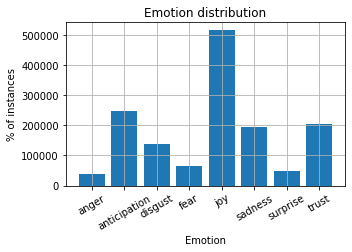

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_tweet['emotion'].unique()
post_total = len(train_tweet)
df1 = train_tweet.groupby(['emotion']).count()['text']
# df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

In [ ]:
### create new featuer "hour" spilt by date
date = train_tweet['date'].apply(lambda x:x.split(' ')[1])
train_tweet['hour'] = date.apply(lambda x:x.split(':')[0])
train_tweet.head()

,tweet_id,identification,emotion,score,index,text,hashtag,date,hour
0,0x29e452,train,joy,809,hashtag_tweets,Huge Respect🖒 @JohnnyVegasReal talking about l...,[],2015-01-17 03:07:03,03
1,0x2b3819,train,joy,808,hashtag_tweets,Yoooo we hit all our monthly goals with the ne...,"[spateradio, app]",2016-07-02 09:34:06,09
2,0x2a2acc,train,trust,16,hashtag_tweets,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,[],2016-08-15 18:18:39,18
3,0x2a8830,train,joy,768,hashtag_tweets,Come join @ambushman27 on #PUBG while he striv...,"[PUBG, GamersUnite, twitch, BeHealthy, StayPos...",2017-02-11 08:49:46,08
4,0x20b21d,train,anticipation,70,hashtag_tweets,@fanshixieen2014 Blessings!My #strength little...,"[strength, bones, God]",2016-11-23 05:37:10,05


Text(0.5, 1.0, 'hour')

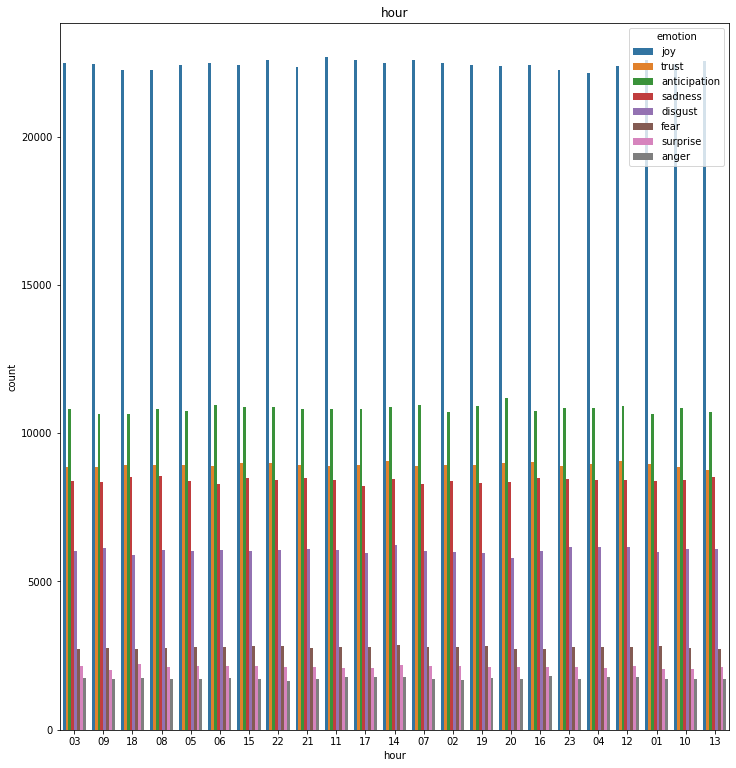

In [ ]:
import seaborn as sns 
plt.figure(figsize=(12,13))
sns.countplot(data=train_tweet, x='hour', hue='emotion')
plt.title('hour')

We can see the hour don't very important in this data because there are very average.

In [ ]:
train_tweet['index'].describe()

count            1455563
unique                 1
top       hashtag_tweets
freq             1455563
Name: index, dtype: object

In [ ]:
train_tweet['score'].describe()

count    1.455563e+06
mean     5.123756e+02
std      2.956457e+02
min      1.000000e+00
25%      2.560000e+02
50%      5.120000e+02
75%      7.680000e+02
max      1.024000e+03
Name: score, dtype: float64

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


Use sentiment analysis to find the text prefer which one 
And it will indicate the score on each text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# BOW_vectorizer = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
# BOW_vectorizer.fit(test_data)
# train_BOW_features = BOW_vectorizer.transform(test_data)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
x = []
for i in range(len(train_tweet)):
  sent = sentiment.polarity_scores(train_tweet['text'][i])
  x.append(sent)
sent = pd.DataFrame(x)
sent['emotion'] = train_tweet['emotion']
sent.head()

,neg,neu,pos,compound,emotion
0,0.198,0.711,0.091,-0.4031,joy
1,0.000,1.000,0.000,0.0000,joy
2,0.000,0.870,0.130,0.2732,trust
3,0.000,0.872,0.128,0.3595,joy
4,0.000,0.741,0.259,0.6800,anticipation


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 36.7 MB/s 
     |████████████████████████████████| 163 kB 51.4 MB/s 


In [ ]:
import transformers
from transformers import pipeline

I transform the "binary" feature to binary type.
If the answer is positive then be transform to 1, negative to 0

In [ ]:
test_data = train_tweet['text'][:5000]
sentiment_pipeline = pipeline("sentiment-analysis")
x = []
for i in range(len(test_data)):
  tmp = str(sentiment_pipeline(test_data[i]))
  x.append(tmp[12:20])
sen = pd.DataFrame(x,columns = ['binary'])
sen['emotion'] = train_tweet['emotion'][:5000]
sen.loc[(sen['binary'] == 'POSITIVE'),'binary'] = 1
sen.loc[(sen['binary'] == 'NEGATIVE'),'binary'] = 0
sen.head()



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

,binary,emotion
0,1,joy
1,0,joy
2,1,trust
3,0,joy
4,1,anticipation


Text(0.5, 1.0, 'binary')

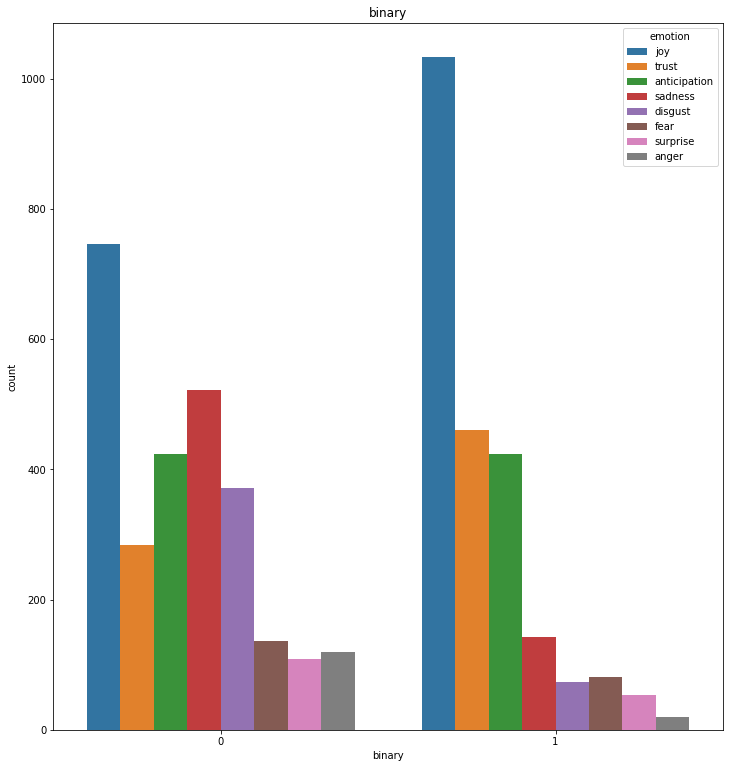

In [ ]:
plt.figure(figsize=(12,13))
sns.countplot(data=sen, x='binary', hue='emotion')
plt.title('binary')

In the picture, we can see the distribution of training data and test data are simliar.

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create a function for the tweet tokenizer from NLTK
def tknzr(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

vectorizer = TfidfVectorizer(min_df=20, max_df=0.95, ngram_range=(1,1), stop_words='english', tokenizer=tknzr).fit(train_tweet['text'])
tfidf_transformed = vectorizer.transform(train_tweet['text'])
test_tfidf = vectorizer.transform(test_tweet['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_transformed,train_tweet['emotion'][:50000],test_size=0.25,random_state=42)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1091672, 35747)
y_train.shape:  (1091672,)
X_test.shape:  (363891, 35747)
y_test.shape:  (363891,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(tfidf_transformed,train_tweet['emotion'])
Y_pred = decision_tree.predict(test_tfidf)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import Pool, CatBoostClassifier
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.15,
                           depth=4,
                          #  cat_features = [0],
                           loss_function='MultiClass')
# Fit model
model.fit(tfidf_transformed,train_tweet['emotion'])

0:	learn: 1.9656741	total: 37.1s	remaining: 1h 1m 12s
1:	learn: 1.8919394	total: 1m 3s	remaining: 51m 53s
2:	learn: 1.8398666	total: 1m 33s	remaining: 50m 16s
3:	learn: 1.8022537	total: 2m 5s	remaining: 50m 15s
4:	learn: 1.7743649	total: 2m 36s	remaining: 49m 30s
5:	learn: 1.7544965	total: 3m 4s	remaining: 48m 16s
6:	learn: 1.7350192	total: 3m 30s	remaining: 46m 33s
7:	learn: 1.7219153	total: 3m 58s	remaining: 45m 48s
8:	learn: 1.7084749	total: 4m 38s	remaining: 46m 51s
9:	learn: 1.6984172	total: 5m 5s	remaining: 45m 46s
10:	learn: 1.6852806	total: 5m 32s	remaining: 44m 51s
11:	learn: 1.6787795	total: 5m 59s	remaining: 43m 53s
12:	learn: 1.6727151	total: 6m 26s	remaining: 43m 5s
13:	learn: 1.6667847	total: 6m 53s	remaining: 42m 20s
14:	learn: 1.6601447	total: 7m 19s	remaining: 41m 30s
15:	learn: 1.6552857	total: 7m 46s	remaining: 40m 48s
16:	learn: 1.6518367	total: 8m 13s	remaining: 40m 9s
17:	learn: 1.6476928	total: 8m 43s	remaining: 39m 43s
18:	learn: 1.6433681	total: 9m 11s	remainin

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(tfidf_transformed,train_tweet['emotion'])
Y_pred = sgd.predict(test_tfidf)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(tfidf_transformed,train_tweet['emotion'])
Y_pred = svc.predict(test_tfidf)

In [ ]:
from sklearn.linear_model import LogisticRegression

# build Logistic Regression
LR_model = LogisticRegression(solver='liblinear', C=10, n_jobs=-1, max_iter=500, tol=0.0001, verbose=2)

# training!
LR_model.fit(tfidf_transformed,train_tweet['emotion'])

# predict!
# y_train_pred = LR_model.predict(X_train)
# y_test_pred = LR_model.predict(test_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[LibLinear]

LogisticRegression(C=10, max_iter=500, n_jobs=-1, solver='liblinear', verbose=2)

Use above model, find that logistic regression score is more higher

Prediction

In [ ]:
prediction = LR_model.predict(test_tfidf)
# preds_class = model.predict(test_tfidf)
# preds_class = preds_class.T

# save as csv!
test_tweet['emotion'] = prediction
output = test_tweet[['tweet_id', 'emotion']].copy()
output = output.set_axis(["id", "emotion"], axis=1)
output.to_csv("hashtag_model1.csv", index=False)
# test_df

In [ ]:
output.head()

,id,emotion
0,0x28cc61,sadness
1,0x2db41f,joy
2,0x2466f6,joy
3,0x23f9e9,joy
4,0x1fb4e1,joy
